In [1]:
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from genetic_selection import GeneticSelectionCV


In [2]:
 
# fetch dataset 
dry_bean_dataset = fetch_ucirepo(id=602) 
  
# data (as pandas dataframes) 
X = dry_bean_dataset.data.features 
y = dry_bean_dataset.data.targets 
  
# metadata 
print(dry_bean_dataset.metadata) 
  
# variable information 
print(dry_bean_dataset.variables) 


{'uci_id': 602, 'name': 'Dry Bean Dataset', 'repository_url': 'https://archive.ics.uci.edu/dataset/602/dry+bean+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/602/data.csv', 'abstract': 'Images of 13,611 grains of 7 different registered dry beans were taken with a high-resolution camera. A total of 16 features; 12 dimensions and 4 shape forms, were obtained from the grains.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 13611, 'num_features': 16, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2020, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C50S4B', 'creators': [], 'intro_paper': {'title': 'Multiclass classification of dry beans using computer vision and machine learning techniques', 'authors': 'M. Koklu, Ilker Ali Özkan', 'published_in': 'Computers and El

In [3]:
X

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRatio,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
0,28395,610.291,208.178117,173.888747,1.197191,0.549812,28715,190.141097,0.763923,0.988856,0.958027,0.913358,0.007332,0.003147,0.834222,0.998724
1,28734,638.018,200.524796,182.734419,1.097356,0.411785,29172,191.272751,0.783968,0.984986,0.887034,0.953861,0.006979,0.003564,0.909851,0.998430
2,29380,624.110,212.826130,175.931143,1.209713,0.562727,29690,193.410904,0.778113,0.989559,0.947849,0.908774,0.007244,0.003048,0.825871,0.999066
3,30008,645.884,210.557999,182.516516,1.153638,0.498616,30724,195.467062,0.782681,0.976696,0.903936,0.928329,0.007017,0.003215,0.861794,0.994199
4,30140,620.134,201.847882,190.279279,1.060798,0.333680,30417,195.896503,0.773098,0.990893,0.984877,0.970516,0.006697,0.003665,0.941900,0.999166
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13606,42097,759.696,288.721612,185.944705,1.552728,0.765002,42508,231.515799,0.714574,0.990331,0.916603,0.801865,0.006858,0.001749,0.642988,0.998385
13607,42101,757.499,281.576392,190.713136,1.476439,0.735702,42494,231.526798,0.799943,0.990752,0.922015,0.822252,0.006688,0.001886,0.676099,0.998219
13608,42139,759.321,281.539928,191.187979,1.472582,0.734065,42569,231.631261,0.729932,0.989899,0.918424,0.822730,0.006681,0.001888,0.676884,0.996767
13609,42147,763.779,283.382636,190.275731,1.489326,0.741055,42667,231.653248,0.705389,0.987813,0.907906,0.817457,0.006724,0.001852,0.668237,0.995222


In [4]:
y

,Class
0,SEKER
1,SEKER
2,SEKER
3,SEKER
4,SEKER
...,...
13606,DERMASON
13607,DERMASON
13608,DERMASON
13609,DERMASON


In [5]:
y.Class.unique()

array(['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'],
      dtype=object)

In [6]:
class_mapping = {
    'SEKER': 0,
    'BARBUNYA': 1,
    'BOMBAY': 2,
    'CALI': 3,
    'HOROZ': 4,
    'SIRA': 5,
    'DERMASON': 6
}
y['Class'] = y['Class'].map(class_mapping)
y

<ipython-input-6-ff95f5073790>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['Class'] = y['Class'].map(class_mapping)


,Class
0,0
1,0
2,0
3,0
4,0
...,...
13606,6
13607,6
13608,6
13609,6


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8,random_state=42)

In [8]:
y_train

,Class
11073,6
13172,6
11587,6
12492,6
430,0
...,...
5191,3
13418,6
5390,3
860,0


In [9]:
estimator = RandomForestClassifier(max_depth=6, random_state=0)
model = GeneticSelectionCV(
    estimator, cv=5, verbose=0,
    scoring="accuracy", max_features=16,
    n_population=100, crossover_proba=0.5,
    mutation_proba=0.2, n_generations=50,
    crossover_independent_proba=0.5,
    mutation_independent_proba=0.04,
    tournament_size=3, n_gen_no_change=10,
    caching=True, n_jobs=-1)
model = model.fit(X_train, y_train)
print('Features:', X.columns[model.support_])

d:\app\anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Features: Index(['Perimeter', 'Solidity', 'Roundness', 'Compactness', 'ShapeFactor1',
       'ShapeFactor4'],
      dtype='object')


In [10]:
X_train_selected = X_train[X_train.columns[model.support_]]
X_test_selected = X_test[X_test.columns[model.support_]]

# Now, you can use the selected features for training and testing
estimator = RandomForestClassifier(max_depth=6, random_state=0)
estimator.fit(X_train_selected, y_train)

<ipython-input-10-bbca7c13e0b2>:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train_selected, y_train)


RandomForestClassifier(max_depth=6, random_state=0)

In [11]:
X_train_selected

,Perimeter,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor4
11073,636.353,0.985961,0.902295,0.818542,0.008084,0.996584
13172,755.186,0.983857,0.839314,0.812405,0.007117,0.995298
11587,651.527,0.988856,0.916795,0.862742,0.007432,0.996584
12492,685.425,0.989246,0.925184,0.829471,0.007314,0.996915
430,710.093,0.988290,0.896038,0.850184,0.007000,0.999390
...,...,...,...,...,...,...
5191,1117.778,0.990908,0.837465,0.726026,0.005386,0.994319
13418,755.392,0.988272,0.877748,0.794264,0.007116,0.997183
5390,1156.599,0.991343,0.845485,0.741012,0.005076,0.994035
860,711.412,0.990386,0.954097,0.896612,0.006420,0.998826


In [12]:
y_pred = estimator.predict(X_test_selected)

In [13]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [14]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Akurasi: {accuracy}')

Akurasi: 0.922879177377892


In [15]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95       413
           1       0.93      0.89      0.91       261
           2       1.00      1.00      1.00       117
           3       0.92      0.94      0.93       317
           4       0.98      0.95      0.96       408
           5       0.85      0.89      0.87       536
           6       0.91      0.92      0.91       671

    accuracy                           0.92      2723
   macro avg       0.94      0.93      0.93      2723
weighted avg       0.92      0.92      0.92      2723



In [16]:
import seaborn as sns
from matplotlib import pyplot as plt

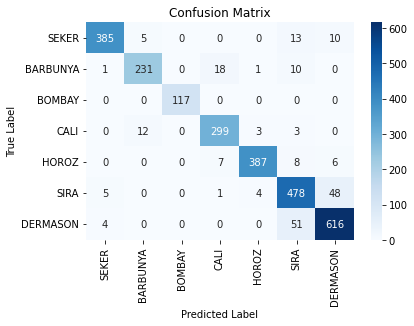

In [17]:
# Hitung confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Tampilkan confusion matrix dengan heatmap menggunakan seaborn
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'], yticklabels=['SEKER', 'BARBUNYA', 'BOMBAY', 'CALI', 'HOROZ', 'SIRA', 'DERMASON'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [18]:
X_train_selected.describe()

,Perimeter,Solidity,Roundness,Compactness,ShapeFactor1,ShapeFactor4
count,10888.000000,10888.000000,10888.000000,10888.000000,10888.000000,10888.000000
mean,854.036474,0.987149,0.873388,0.800005,0.006569,0.995093
std,213.001952,0.004653,0.059513,0.061623,0.001127,0.004343
min,524.736000,0.919246,0.489618,0.645368,0.002778,0.947687
25%,702.899250,0.985673,0.832773,0.762521,0.005904,0.993747
50%,793.646500,0.988287,0.883331,0.801399,0.006648,0.996418
75%,976.670750,0.990006,0.917017,0.834079,0.007280,0.997890
max,1985.370000,0.994677,0.987920,0.987303,0.010451,0.999733
